<a href="https://colab.research.google.com/github/sespezua/cursos/blob/master/Projeto_20_Previs%C3%A3o_do_pre%C3%A7o_de_a%C3%A7%C3%B5es_com_redes_neurais_recorrentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 20: Previsão do preço de ações com redes neurais recorrentes

## Etapa 1: Importação das bibliotecas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from sklearn.metrics import mean_absolute_error
torch.__version__

'1.4.0'

In [ ]:
torch.manual_seed(123)

## Etapa 2: Base de dados

In [ ]:
base = pd.read_csv('/content/petr4_treinamento.csv')

In [ ]:
base.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0


In [ ]:
base.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1240,2017-12-25,15.75,15.750000,15.75,15.750000,15.718563,0.0
1241,2017-12-26,15.75,15.990000,15.69,15.970000,15.938125,22173100.0
1242,2017-12-27,15.99,16.139999,15.98,16.049999,16.017963,23552200.0
1243,2017-12-28,16.10,16.129999,16.00,16.100000,16.067865,19011500.0
1244,2017-12-29,16.10,16.100000,16.10,16.100000,16.067865,0.0


In [ ]:
base.shape

(1245, 7)

In [ ]:
base = base.dropna()

In [ ]:
base.shape

(1242, 7)

In [ ]:
base_treinamento = base.iloc[:, 1:2].values

In [ ]:
base_treinamento

array([[19.99    ],
       [19.809999],
       [20.33    ],
       ...,
       [15.99    ],
       [16.1     ],
       [16.1     ]])

In [ ]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

In [ ]:
base_treinamento_normalizada

array([[0.76501938],
       [0.7562984 ],
       [0.78149225],
       ...,
       [0.57122093],
       [0.57655039],
       [0.57655039]])

In [ ]:
X = []
y = []
for i in range(90, 1242):
  X.append(base_treinamento_normalizada[i-90:i, 0])
  y.append(base_treinamento_normalizada[i, 0])
X, y = np.array(X), np.array(y)

In [ ]:
X[0]

array([0.76501938, 0.7562984 , 0.78149225, 0.78875969, 0.77083338,
       0.74806197, 0.75436047, 0.75823643, 0.76598837, 0.76598837,
       0.76017437, 0.75872098, 0.75581391, 0.74467054, 0.7374031 ,
       0.7374031 , 0.73498067, 0.75242248, 0.73401163, 0.71656977,
       0.68120155, 0.67538755, 0.67635659, 0.63372098, 0.66521318,
       0.65649225, 0.64680228, 0.66618222, 0.65843028, 0.64970935,
       0.65116274, 0.66424419, 0.67344961, 0.64292631, 0.64486434,
       0.62257747, 0.60949617, 0.60998067, 0.60852713, 0.59593023,
       0.61143411, 0.60222863, 0.64922481, 0.68362398, 0.70687989,
       0.68265509, 0.70978682, 0.70784879, 0.71608527, 0.73643411,
       0.7122093 , 0.7122093 , 0.7194767 , 0.70348832, 0.69525189,
       0.70397287, 0.70397287, 0.69767442, 0.68168605, 0.68168605,
       0.65310078, 0.66618222, 0.64825581, 0.66182175, 0.64341085,
       0.67877902, 0.69137592, 0.66569772, 0.65406982, 0.64292631,
       0.64147292, 0.63565891, 0.67587209, 0.68653106, 0.70300

In [ ]:
y[0]

0.7611434108527131

In [ ]:
X[1]

array([0.7562984 , 0.78149225, 0.78875969, 0.77083338, 0.74806197,
       0.75436047, 0.75823643, 0.76598837, 0.76598837, 0.76017437,
       0.75872098, 0.75581391, 0.74467054, 0.7374031 , 0.7374031 ,
       0.73498067, 0.75242248, 0.73401163, 0.71656977, 0.68120155,
       0.67538755, 0.67635659, 0.63372098, 0.66521318, 0.65649225,
       0.64680228, 0.66618222, 0.65843028, 0.64970935, 0.65116274,
       0.66424419, 0.67344961, 0.64292631, 0.64486434, 0.62257747,
       0.60949617, 0.60998067, 0.60852713, 0.59593023, 0.61143411,
       0.60222863, 0.64922481, 0.68362398, 0.70687989, 0.68265509,
       0.70978682, 0.70784879, 0.71608527, 0.73643411, 0.7122093 ,
       0.7122093 , 0.7194767 , 0.70348832, 0.69525189, 0.70397287,
       0.70397287, 0.69767442, 0.68168605, 0.68168605, 0.65310078,
       0.66618222, 0.64825581, 0.66182175, 0.64341085, 0.67877902,
       0.69137592, 0.66569772, 0.65406982, 0.64292631, 0.64147292,
       0.63565891, 0.67587209, 0.68653106, 0.70300383, 0.71996

In [ ]:
y[1]

0.7611434108527131

In [ ]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [ ]:
dataset = torch.utils.data.TensorDataset(X, y)
loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

## Etapa 3: Construção da rede neural recorrente

In [ ]:
class regressor_LSTM(nn.Module):
  def __init__(self):
    super().__init__()

    self.lstm1 = nn.LSTM(input_size=1, hidden_size=100)
    self.lstm2 = nn.LSTM(100, 50)
    self.lstm3 = nn.LSTM(50, 50, dropout = 0.3, num_layers=2)
    self.dropout = nn.Dropout(p = 0.3)
    self.linear = nn.Linear(in_features=50, out_features=1)

  def forward(self, X):
    # (batch_size, timesteps) -> (timesteps, batch_size, dimensions)
    X = X.permute(1, 0).unsqueeze(2)
    X, _ = self.lstm1(X)
    X = self.dropout(X)
    X, _ = self.lstm2(X)
    X = self.dropout(X)
    X, _ = self.lstm3(X)

    X = X[-1]
    X = self.dropout(X)
    X = self.linear(X)

    return X

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
device

device(type='cuda')

In [ ]:
regressor = regressor_LSTM()
criterion = nn.MSELoss()
# Atenção: caso você tenha sempre os mesmos resultados de previsões, utilize os parâmetros lr e alpha abaixo
optimizer = optim.RMSprop(regressor.parameters(), lr = 1e-3, alpha = 0.9)

In [ ]:
regressor.to(device)

regressor_LSTM(
  (lstm1): LSTM(1, 100)
  (lstm2): LSTM(100, 50)
  (lstm3): LSTM(50, 50, num_layers=2, dropout=0.3)
  (dropout): Dropout(p=0.3, inplace=False)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

## Etapa 4: Treinamento do modelo

In [ ]:
for epoch in range(100):
    running_loss = 0.
    running_mae = 0.
          
    for i, data in enumerate(loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = regressor(inputs)
        outputs = outputs.flatten()
        
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
    
        running_loss += loss.item()
        
        mae = mean_absolute_error(labels.detach().cpu().numpy().flatten(), 
                                  outputs.detach().cpu().numpy().flatten())
        running_mae += mae
        
        # Imprimindo os dados referentes a esse loop
        print('\rÉpoca {:3d} - Loop {:3d} de {:3d}: custo {:03.5f} - MAE {:03.5f}'.format(epoch+1, i+1, len(loader), loss, mae), end = '\r')
    
    # Imprimindo os dados referentes a essa época
    running_loss /= len(loader)
    running_mae /= len(loader)
    print('ÉPOCA {:3d} FINALIZADA: custo {:03.6f} - MAE {:03.6f}     '.format(epoch+1, running_loss, running_mae))

ÉPOCA   1 FINALIZADA: custo 0.617197 - MAE 0.392042     
ÉPOCA   2 FINALIZADA: custo 0.044489 - MAE 0.173143     
ÉPOCA   3 FINALIZADA: custo 0.042634 - MAE 0.168486     
ÉPOCA   4 FINALIZADA: custo 0.042580 - MAE 0.167780     
ÉPOCA   5 FINALIZADA: custo 0.042988 - MAE 0.169501     
ÉPOCA   6 FINALIZADA: custo 0.041258 - MAE 0.165216     
ÉPOCA   7 FINALIZADA: custo 0.040895 - MAE 0.166067     
ÉPOCA   8 FINALIZADA: custo 0.041720 - MAE 0.166694     
ÉPOCA   9 FINALIZADA: custo 0.042168 - MAE 0.168636     
ÉPOCA  10 FINALIZADA: custo 0.041595 - MAE 0.167798     
ÉPOCA  11 FINALIZADA: custo 0.041157 - MAE 0.166043     
ÉPOCA  12 FINALIZADA: custo 0.040735 - MAE 0.166048     
ÉPOCA  13 FINALIZADA: custo 0.040076 - MAE 0.164315     
ÉPOCA  14 FINALIZADA: custo 0.039879 - MAE 0.163793     
ÉPOCA  15 FINALIZADA: custo 0.040431 - MAE 0.164462     
ÉPOCA  16 FINALIZADA: custo 0.041346 - MAE 0.166684     
ÉPOCA  17 FINALIZADA: custo 0.040531 - MAE 0.164659     
ÉPOCA  18 FINALIZADA: custo 0.0

## Etapa 5: Processamento da base de teste

In [ ]:
base_teste = pd.read_csv('/content/petr4_teste.csv')

In [ ]:
base_teste.shape

(22, 7)

In [ ]:
base.head(22)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
5,2013-01-09,19.639999,19.870001,19.459999,19.680000,18.077084,24361100.0
6,2013-01-10,19.770000,20.049999,19.540001,19.830000,18.214869,17526200.0
7,2013-01-11,19.850000,20.040001,19.700001,19.879999,18.260794,18223600.0
8,2013-01-14,20.010000,20.240000,19.690001,19.719999,18.113827,28302400.0
9,2013-01-15,20.010000,20.240000,19.690001,19.820000,18.205681,29633900.0


In [ ]:
preco_real_teste = base_teste.iloc[:, 1:2].values

In [ ]:
preco_real_teste

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [ ]:
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)

In [ ]:
base.shape

(1242, 7)

In [ ]:
1264 - 1242

22

In [ ]:
base_completa.shape

(1264,)

In [ ]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values

In [ ]:
entradas

array([13.93    , 13.76    , 13.79    , 13.53    , 13.85    , 13.96    ,
       14.57    , 14.65    , 15.02    , 15.1     , 14.88    , 14.98    ,
       14.94    , 15.03    , 15.07    , 15.02    , 15.1     , 15.25    ,
       15.85    , 15.6     , 15.79    , 15.86    , 15.7     , 15.37    ,
       15.5     , 15.19    , 15.6     , 15.9     , 15.88    , 15.66    ,
       15.61    , 16.129999, 16.17    , 16.08    , 16.23    , 16.16    ,
       16.139999, 16.219999, 16.      , 16.190001, 16.290001, 16.290001,
       16.530001, 16.780001, 16.77    , 16.969999, 16.9     , 16.99    ,
       16.9     , 16.959999, 17.049999, 17.309999, 16.690001, 16.889999,
       16.709999, 16.690001, 16.639999, 15.35    , 15.62    , 15.92    ,
       16.02    , 16.15    , 16.09    , 15.98    , 16.25    , 16.01    ,
       15.93    , 15.87    , 15.3     , 15.34    , 15.65    , 15.5     ,
       15.22    , 15.3     , 15.51    , 15.48    , 15.36    , 15.65    ,
       15.1     , 15.05    , 15.16    , 15.18    , 

In [ ]:
entradas.shape

(112,)

In [ ]:
entradas = entradas.reshape(-1,1)
entradas.shape

(112, 1)

In [ ]:
entradas = normalizador.transform(entradas)
entradas

array([[0.47141473],
       [0.46317829],
       [0.46463178],
       [0.45203488],
       [0.46753876],
       [0.47286822],
       [0.50242248],
       [0.50629845],
       [0.52422481],
       [0.52810078],
       [0.51744186],
       [0.52228682],
       [0.52034884],
       [0.5247093 ],
       [0.52664729],
       [0.52422481],
       [0.52810078],
       [0.53536822],
       [0.56443798],
       [0.55232558],
       [0.56153101],
       [0.56492248],
       [0.55717054],
       [0.54118217],
       [0.54748062],
       [0.53246124],
       [0.55232558],
       [0.56686047],
       [0.56589147],
       [0.55523256],
       [0.55281008],
       [0.57800383],
       [0.57994186],
       [0.5755814 ],
       [0.58284884],
       [0.57945736],
       [0.57848832],
       [0.58236429],
       [0.57170543],
       [0.5809109 ],
       [0.58575586],
       [0.58575586],
       [0.59738377],
       [0.60949617],
       [0.60901163],
       [0.6187015 ],
       [0.61531008],
       [0.619

In [ ]:
112 - 90

22

In [ ]:
X_teste = []
for i in range(90, 112):
  X_teste.append(entradas[i-90:i, 0])
X_teste = np.array(X_teste)

In [ ]:
X_teste[21]

array([0.56492248, 0.55717054, 0.54118217, 0.54748062, 0.53246124,
       0.55232558, 0.56686047, 0.56589147, 0.55523256, 0.55281008,
       0.57800383, 0.57994186, 0.5755814 , 0.58284884, 0.57945736,
       0.57848832, 0.58236429, 0.57170543, 0.5809109 , 0.58575586,
       0.58575586, 0.59738377, 0.60949617, 0.60901163, 0.6187015 ,
       0.61531008, 0.61967054, 0.61531008, 0.61821701, 0.62257747,
       0.63517437, 0.60513571, 0.61482553, 0.6061046 , 0.60513571,
       0.60271313, 0.54021318, 0.55329457, 0.56782946, 0.57267442,
       0.57897287, 0.57606589, 0.57073643, 0.58381783, 0.57218992,
       0.56831395, 0.56540698, 0.5377907 , 0.53972868, 0.55474806,
       0.54748062, 0.53391473, 0.5377907 , 0.54796512, 0.54651163,
       0.54069767, 0.55474806, 0.52810078, 0.52567829, 0.53100775,
       0.53197674, 0.53343023, 0.53827519, 0.55959302, 0.55959302,
       0.55959302, 0.57122093, 0.57655039, 0.57655039, 0.5809109 ,
       0.59544574, 0.60949617, 0.6056202 , 0.60755814, 0.62160

In [ ]:
X_teste = torch.tensor(X_teste, device = device, dtype=torch.float32)

## Etapa 6: Previsões

In [ ]:
regressor.eval()
previsoes = regressor.forward(X_teste)

In [ ]:
previsoes

tensor([[0.5433],
        [0.5456],
        [0.5531],
        [0.5643],
        [0.5677],
        [0.5692],
        [0.5785],
        [0.5810],
        [0.5795],
        [0.5849],
        [0.5946],
        [0.6001],
        [0.6176],
        [0.6390],
        [0.6451],
        [0.6465],
        [0.6518],
        [0.6524],
        [0.6778],
        [0.7033],
        [0.7141],
        [0.7245]], device='cuda:0', grad_fn=<AddmmBackward>)

In [ ]:
previsoes.shape

torch.Size([22, 1])

In [ ]:
previsoes = previsoes.detach().cpu().numpy().reshape(-1,1)
previsoes.shape

(22, 1)

In [ ]:
previsoes = normalizador.inverse_transform(previsoes)

In [ ]:
previsoes.mean()

16.89705

In [ ]:
preco_real_teste.mean()

17.87454563636364

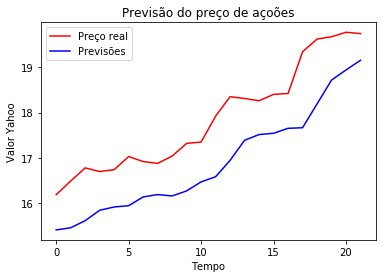

In [ ]:
plt.plot(preco_real_teste, color='red', label='Preço real')
plt.plot(previsoes, color = 'blue', label='Previsões')
plt.title('Previsão do preço de açoões')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()